Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

Generate synthetic binary classification dataset using numpy. Create a dataset of 100 samples with two features

In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 2) - 1  # Feature values between -1 and 1 (2 features)
y = (2 * X[:, 0] + 3 * X[:, 1] > 0).astype(int)  # Class label: 1 if the linear combination is > 0, else 0

Split the data into training and testing sets (80% training, 20% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit Perceptron model using scikit-learn

In [ ]:
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)  # Train the model on the training data

Perceptron()

Predict the class labels for the test data

In [ ]:
y_pred = perceptron.predict(X_test)

Model parameters (weights and bias)

In [ ]:
print("Weights:", perceptron.coef_)
print("Bias (Intercept):", perceptron.intercept_)

Weights: [[4.20010721 5.38033609]]
Bias (Intercept): [0.]


Visualizing the decision boundary

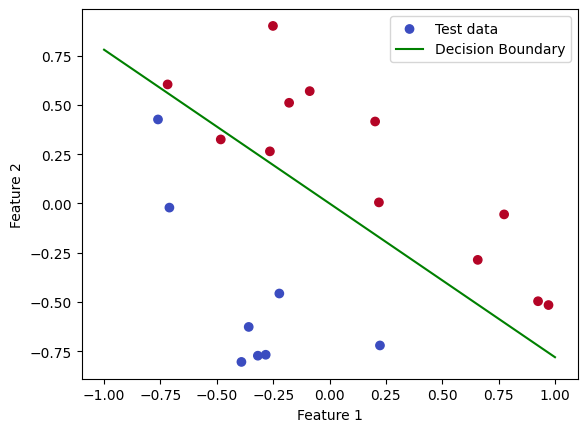

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='Test data')  # Plot test data points
x_boundary = np.linspace(-1, 1, 100)
y_boundary = -(perceptron.coef_[0, 0] * x_boundary + perceptron.intercept_) / perceptron.coef_[0, 1]
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')  # Decision boundary
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

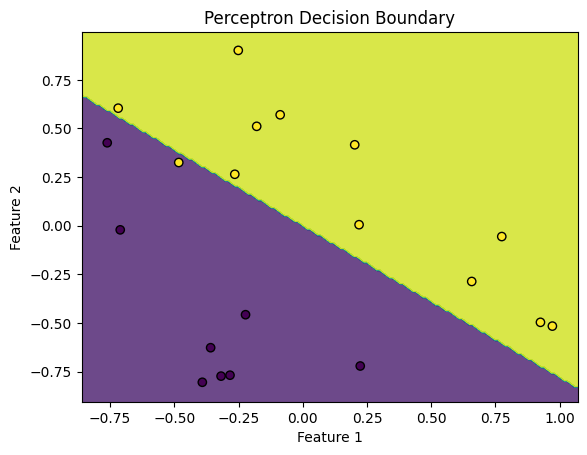

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(perceptron, X_test, y_test)

Essential Metrics Calculation

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


Precision

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 1.0


Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9166666666666666


F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9565217391304348


ROC-AUC (Area Under the Receiver Operating Characteristic Curve)

In [ ]:
y_prob = perceptron.decision_function(X_test)  # Get the decision scores instead of probabilities
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


Predict on a new test example

In [ ]:
new_test_example = np.array([[0.5, -0.2]])  # New test example with two features
new_prediction = perceptron.predict(new_test_example)
print("Prediction for the new test example:", new_prediction)

Prediction for the new test example: [1]
